In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
data = pd.read_csv('preprocessed-data.csv')
display(data.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Day of week (name),Hour
0,2011-01-01T00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,0
1,2011-01-01T01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,1
2,2011-01-01T02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,2
3,2011-01-01T03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,3
4,2011-01-01T04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,4


In [83]:
display(data.iloc[0])
display(data.shape[0])

datetime              2011-01-01T00:00
season                               1
holiday                              0
workingday                           0
weather                              1
temp                              9.84
atemp                           14.395
humidity                            81
windspeed                            0
casual                               3
registered                          13
count                               16
Day of week (name)            Saturday
Hour                                 0
Name: 0, dtype: object

10886

In [87]:
df = data.groupby(['Day of week (name)', 'Hour'])['count'].sum()
df = pd.DataFrame(df)
df = df.reset_index()
display(df.head())

,Day of week (name),Hour,count
0,Friday,0,3407
1,Friday,1,1565
2,Friday,2,802
3,Friday,3,392
4,Friday,4,350


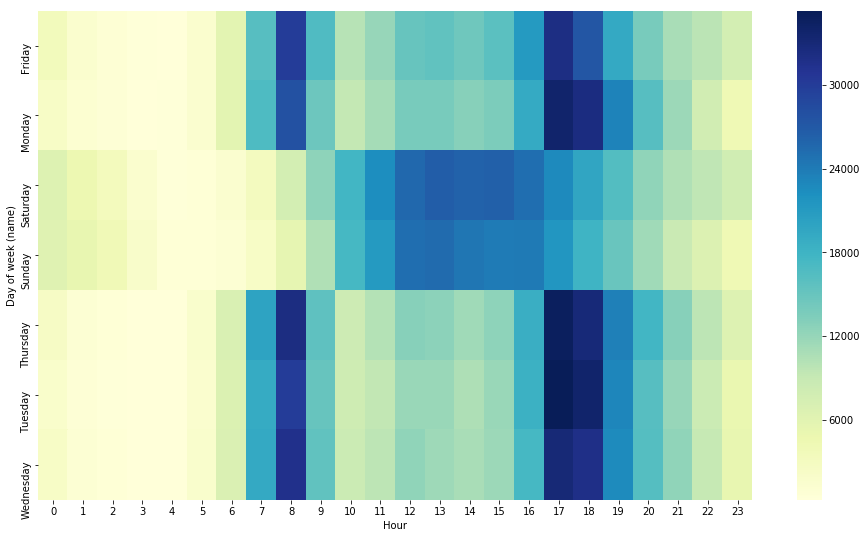

In [88]:
pivotHeatMap = df.pivot("Day of week (name)", "Hour", "count")
ax = sns.heatmap(pivotHeatMap, cmap="YlGnBu")
plt.show()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week (name),,,,,,,,,,,,,,,,,,,,,
Monday,2307,1175,672,335,393,1457,5801,16926,27827,14713,...,12972,13660,19178,33890,32472,23396,16229,11632,7802,4340
Tuesday,1749,750,397,234,325,1537,6744,19047,30027,15113,...,10561,11770,18467,35371,33983,23148,16244,11909,8491,4944
Wednesday,2356,1015,527,305,287,1628,6878,19321,31537,15520,...,10850,11673,17448,33102,31811,22635,16352,12393,9126,5209
Thursday,2436,1002,539,297,334,1658,7035,20000,32276,15718,...,11353,12575,18741,34876,32943,23663,17701,12981,9676,6476
Friday,3407,1565,802,392,350,1496,5847,16263,30093,16794,...,14532,15901,21216,32129,27366,19428,13875,10939,9768,7651


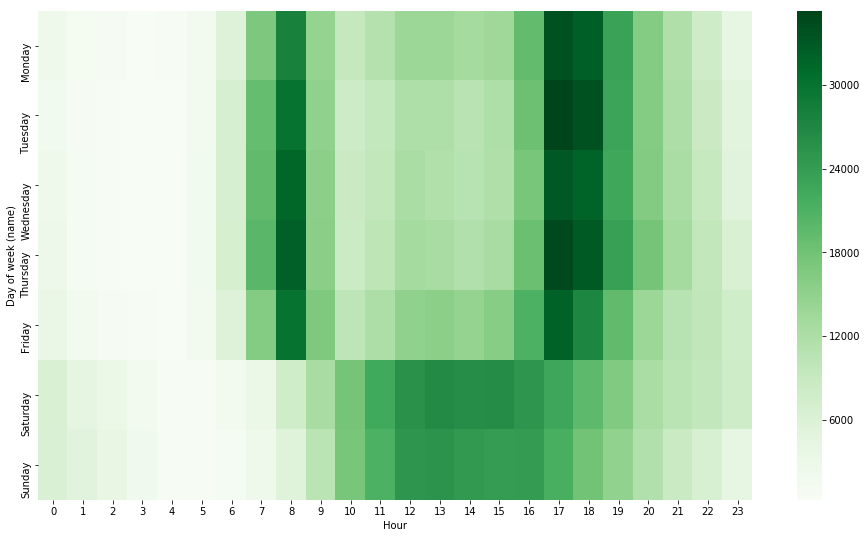

In [89]:
df = df.pivot("Day of week (name)", "Hour", "count")
daysOrder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = df.reindex(index=daysOrder)
display(df.head())
ax = sns.heatmap(df, cmap="Greens")

plt.rcParams["figure.figsize"] = [16,9]
plt.show()